## hindcast example

In [ ]:
#to use the full width of the browser window
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from pyPoseidon.utils.cast import *
from pyPoseidon.utils.data import *

### setup

In [2]:
#read the info from the first run
with open('/Users/brey/Downloads/EUR1/20100201.00/eur025_info.pkl', 'r') as f:
              info=pickle.load(f)

In [3]:
#define some info
info.update({'path':'/Users/brey/Downloads/EUR1/', # The path of the project
     'case':'European 2010', # a reference tag
     })

In [4]:
#creating a time sequence of the runs
#creating a time sequence of the runs
start_date = pd.to_datetime('2010-2-1 0:0:0')
end_date = pd.to_datetime('2010-2-2 0:0:0')
date_list = pd.date_range(start_date,end_date, freq='12H')
date_list

DatetimeIndex(['2010-02-01 00:00:00', '2010-02-01 12:00:00',
               '2010-02-02 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [5]:
#append to dic
info.update({'start_date':start_date,'end_date':end_date, 'dates' : date_list})

In [6]:
#creating a sequence of folder to store the runs. In this case we name them after the date attribute.
#NOTE that the first folder is the fisrt run already perfomed!!
folders = [datetime.datetime.strftime(x, '%Y%m%d.%H') for x in date_list]
info.update({'folders':folders})

In [7]:
#creating a sequence of folder from which we read the meteo.
meteo = []
PATH='/Users/brey/Downloads/'
for date in date_list:
    end_date= pd.to_datetime(date) + pd.to_timedelta(info['time_frame'])
    end_date = end_date.strftime(format='%Y-%m-%d %H:%M:%S')
    dr = pd.date_range(date, end_date, freq='12H')
    dur = [PATH+'{:04d}/{:02d}/{:02d}/'.format(x.year,x.month,x.day)+datetime.datetime.strftime(x, '%Y%m%d.%H')+'.tropical_cyclone.grib' for x in dr]
    meteo.append(dur)

In [8]:
info.update({'meteo_files':meteo})

In [9]:
#check
info['folders'],info['meteo_files']

(['20100201.00', '20100201.12', '20100202.00'],
 [['/Users/brey/Downloads/2010/02/01/20100201.00.tropical_cyclone.grib',
   '/Users/brey/Downloads/2010/02/01/20100201.12.tropical_cyclone.grib'],
  ['/Users/brey/Downloads/2010/02/01/20100201.12.tropical_cyclone.grib',
   '/Users/brey/Downloads/2010/02/02/20100202.00.tropical_cyclone.grib'],
  ['/Users/brey/Downloads/2010/02/02/20100202.00.tropical_cyclone.grib',
   '/Users/brey/Downloads/2010/02/02/20100202.12.tropical_cyclone.grib']])

In [10]:
#check dict
#info

### run the hindcast

In [11]:
#set cast
h = cast(**info) # initialize

In [12]:
h.run()

process meteo

extracting meteo from /Users/brey/Downloads/2010/02/01/20100201.12.tropical_cyclone.grib

retrieving msl at 2010-02-01 12:00:00

retrieving 10u at 2010-02-01 12:00:00

retrieving 10v at 2010-02-01 12:00:00

retrieving msl at 2010-02-01 15:00:00

retrieving 10u at 2010-02-01 15:00:00

retrieving 10v at 2010-02-01 15:00:00

retrieving msl at 2010-02-01 18:00:00

retrieving 10u at 2010-02-01 18:00:00

retrieving 10v at 2010-02-01 18:00:00

retrieving msl at 2010-02-01 21:00:00

retrieving 10u at 2010-02-01 21:00:00

retrieving 10v at 2010-02-01 21:00:00

extracting meteo from /Users/brey/Downloads/2010/02/02/20100202.00.tropical_cyclone.grib

retrieving msl at 2010-02-02 00:00:00

retrieving 10u at 2010-02-02 00:00:00

retrieving 10v at 2010-02-02 00:00:00

meteo done
executing
MPI process number 001 has host unknown and is running on processor dmapcgf.isferea.project
MPI process number 000 has host unknown and is running on processor dmapcgf.isferea.project
MPI process num

INFO:root:done for date :20100201.12


process meteo

extracting meteo from /Users/brey/Downloads/2010/02/02/20100202.00.tropical_cyclone.grib

retrieving msl at 2010-02-02 00:00:00

retrieving 10u at 2010-02-02 00:00:00

retrieving 10v at 2010-02-02 00:00:00

retrieving msl at 2010-02-02 03:00:00

retrieving 10u at 2010-02-02 03:00:00

retrieving 10v at 2010-02-02 03:00:00

retrieving msl at 2010-02-02 06:00:00

retrieving 10u at 2010-02-02 06:00:00

retrieving 10v at 2010-02-02 06:00:00

retrieving msl at 2010-02-02 09:00:00

retrieving 10u at 2010-02-02 09:00:00

retrieving 10v at 2010-02-02 09:00:00

extracting meteo from /Users/brey/Downloads/2010/02/02/20100202.12.tropical_cyclone.grib

retrieving msl at 2010-02-02 12:00:00

retrieving 10u at 2010-02-02 12:00:00

retrieving 10v at 2010-02-02 12:00:00

meteo done
executing
MPI process number 000 has host unknown and is running on processor dmapcgf.isferea.project
MPI process number 001 has host unknown and is running on processor dmapcgf.isferea.project
MPI process num

INFO:root:done for date :20100202.00


## Analysis of data

In [13]:
%matplotlib inline

In [46]:
folders = [info['path']+f for f in info['folders']]

In [47]:
otp = data(folders)#,sa_date='2010-2-1',se_date='2010-2-2 12:0:0') # optionally set range for tide gauge data acquisition 


reading data based on /Users/brey/Downloads/EUR1/20100201.00/eur025_info.pkl 


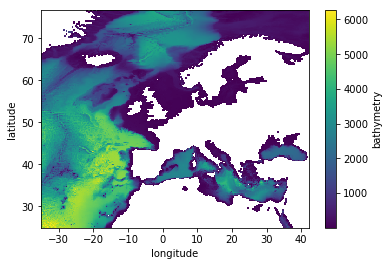

In [49]:
otp.dem.bathymetry.plot()

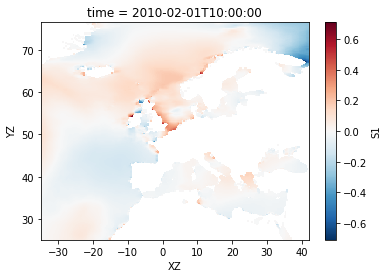

In [50]:
otp.vars.S1[10,:,:].plot()

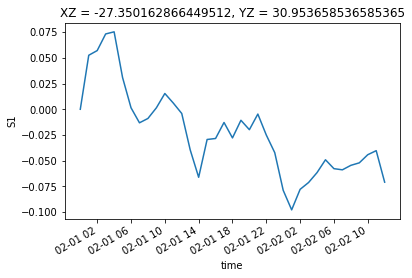

In [54]:
otp.vars.S1[:,23,30].plot.line()

In [39]:
otp.obs.locations

,ID,Name,Group,Latency,Details,Last Date,Max. Time,Min. Time,lat,lon,Status
0,2576,Denmark -Hunderstend,DMI,11m,Details,09 Apr 2018 11:30,28 Aug 2017 10:10,01 Jan 2010 00:05,55.966,11.843,Active
1,1044,Tamosy Large Panel (Press),TAD,11m,Details,20 Jun 2030 05:01,05 Aug 2062 21:01,11 Jan 2000 00:03,46.500,8.617,Active
2,894,Denmark - Hirtshals,TD UNESCO,1h 1m,Details,09 Apr 2018 10:40,09 Apr 2018 10:40,31 Dec 2009 00:10,57.600,9.970,Active
3,1284,France - Brest,TD UNESCO,58m,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,48.380,-4.500,Active
4,1444,France - Calais,TD UNESCO,58m,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,50.969,1.868,Active
5,1289,France - Cherbourg,TD UNESCO,58m,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,49.650,-1.630,Active
6,1511,Germany - Helgoland Binnenhafen,TD UNESCO,46m,Details,09 Apr 2018 10:55,09 Apr 2018 10:55,01 Jan 2005 00:01,54.176,7.891,Active
7,1703,Norway - Tregde,TD UNESCO,41m,Details,09 Apr 2018 11:00,09 Apr 2018 09:00,01 Jan 2010 00:10,58.000,7.567,Active
8,831,Portugal - Cascais,TD UNESCO,4h 49m,Details,09 Apr 2018 06:51,09 Apr 2018 06:51,01 Jan 2010 00:04,38.693,-9.000,Active
9,873,Spain - Ferrol1,TD UNESCO,43m,Details,09 Apr 2018 10:58,09 Apr 2018 08:58,02 Jan 2010 00:01,43.460,-8.330,Active


In [55]:
# Get with index number
p = otp.obs.iloc(2)
print p.head()
print p.tail()

                     Total Sea Level   Tide  Storm Surge
time                                                    
2010-02-01 00:00:00            -0.19 -0.198        0.008
2010-02-01 00:10:00            -0.16 -0.183        0.023
2010-02-01 00:20:00            -0.15 -0.169        0.019
2010-02-01 00:30:00            -0.14 -0.156        0.016
2010-02-01 00:40:00            -0.14 -0.144        0.004
                     Total Sea Level   Tide  Storm Surge
time                                                    
2010-02-05 11:20:00            -0.49 -0.094       -0.396
2010-02-05 11:30:00            -0.48 -0.108       -0.372
2010-02-05 11:40:00            -0.55 -0.123       -0.427
2010-02-05 11:50:00            -0.50 -0.138       -0.362
2010-02-05 12:00:00            -0.52 -0.153       -0.367


In [56]:
plat,plon = otp.obs.locations.loc[2,['lat','lon']]

In [57]:
ts = point(lon=plon,lat=plat,data=otp)
ts.tseries(var='S1')

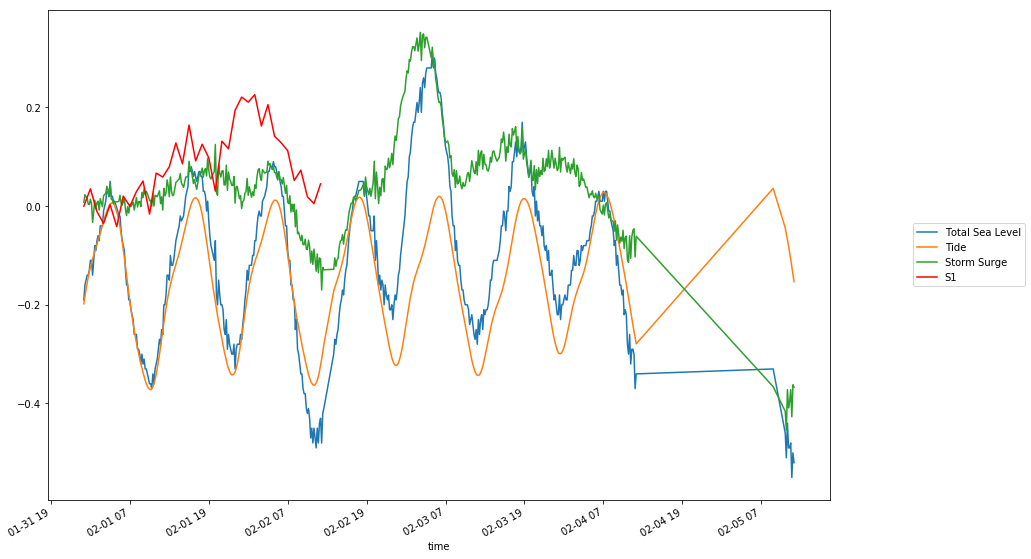

In [58]:
## Join the graphs
ax = p.plot(figsize=(14,10))
ts.S1.plot(ax=ax,color=['r'],label='d3d')
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))